In [2]:
import networkx as nx
%matplotlib inline
import numpy.random as rnd

In [59]:
class HCgraph(nx.Graph):
    def __init__(self, household_size, community_size, number_of_communities):
        self._household_size = household_size
        self._community_size = community_size
        self._number_of_communities = number_of_communities
        G = self.create_community(community_size)
        for i in range(1, number_of_communities):
            C = self.create_community(community_size-1)
            G = self.add_community(G, C)
        last_community = len(G.nodes())/household_size-1
        for i in range(0, household_size*(community_size-1)/household_size):
            G.add_edge(self.get_random_node(last_community), self.get_random_node(i))
        nx.Graph.__init__(self,G)

    def create_household(self):
        G=nx.complete_graph(self._household_size)
        return G

    def create_community(self, community_size):
        households = []
        for i in range(community_size):
            H =self.create_household()
            households.insert(0, H)
        G = households[0]
        for i in range(1, len(households)):
            G = nx.disjoint_union(G, households[i])
        for i in range(len(households)-1):
            for j in range(i+1, len(households)):
                G.add_edge(self.get_random_node(i), self.get_random_node(j))
        print G.nodes()
        return G

    def add_community(self, G, community):
        last_community = len(G.nodes())/self._household_size-1
        G=nx.disjoint_union(G, community)
        for i in range(last_community+1, last_community+len(community.nodes())/self._household_size+1):
            G.add_edge(self.get_random_node(last_community), self.get_random_node(i))
        return G

    def get_random_node(self, household_number):
        low = self._household_size*household_number
        return rnd.randint(low, low+self._household_size-1)
    
    def get_nodes_in_community(self, s_node):
        intervals = {}
        household_number = s_node/self._household_size
        s_comm = s_node/((self._community_size-1)*self._household_size)
        print s_comm
        s_from = s_comm*((self._community_size-1)*self._household_size)
        s_to = s_from+self._household_size*self._community_size-1
        #deal with overflow
        num_of_nodes = len(self.nodes())
        if s_to>num_of_nodes:
            s_to = s_to-num_of_nodes
        print s_from, s_to
        intervals[0] = [s_from, s_to]
        if household_number%(community_size-1)==0:
            if s_comm==0:
                s_from1 = num_of_nodes-household_size
                s_to1 = num_of_nodes-1
            else:
                s_comm1 = s_comm-1
                s_from1 = s_comm1*((community_size-1)*household_size)
                s_to1 = s_from1+household_size*community_size-1
            print s_from1, s_to1
            intervals[1] = [s_from1, s_to1]
        return intervals
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
1
12 27
0 15


{0: [12, 27], 1: [0, 15]}

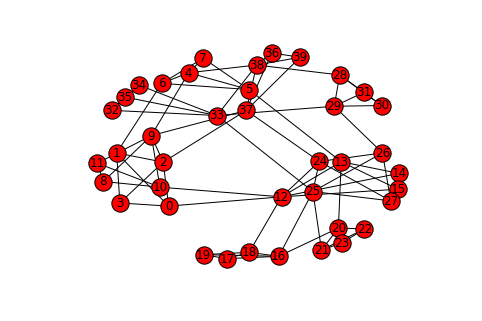

In [60]:
household_size = 4
community_size = 4
number_of_communities = 3
G = HCgraph(household_size, community_size, number_of_communities)
nx.draw(G, with_labels = True)
# print G.nodes()
#number of households
# print len(G.nodes())/household_size
# s_node = 1
# # get the household number in which the node resides
# household_number = s_node/household_size
# # household number mod community_size-1 - household number that reside in several communities
# #if household in one community it is in node/((community_size-1)*household_size)

# #community 0 - 0-8, 1 - 6-14, 2 - 12-20, 3 - 18-5
# print household_number
# print (community_size-1)*household_size
# s_comm = s_node/((community_size-1)*household_size)
# print s_comm
# s_from = s_comm*((community_size-1)*household_size)
# s_to = s_from+household_size*community_size-1
# #deal with overflow
# num_of_nodes = len(G.nodes())
# if s_to>num_of_nodes:
#     s_to = s_to-num_of_nodes
# print s_from, s_to
# if household_number%(community_size-1)==0:
#     if s_comm==0:
#         s_from1 = num_of_nodes-household_size
#         s_to1 = num_of_nodes-1
#     else:
#         s_comm1 = s_comm-1
#         s_from1 = s_comm1*((community_size-1)*household_size)
#         s_to1 = s_from1+household_size*community_size-1
#     print s_from1, s_to1
# for n in G.nodes():
#     print "neighbors",len(G.neighbors(n))
G.get_nodes_in_community(13)